# Comp 551 : Mini Project 3


This notebook contains the code for algorithm implementation and experiments for MiniProject 4

Experiments to reproduce:

- Figure 5 (knn accuracy for COIL-20 and PenDigits)
- Table 1 (knn accuracy for COIL-20 and PenDigits)
 

Datasets to use: 

- COIL-20
- PenDigits


Methods to use: 
- PCA
- Laplacian Eigenmaps
- LargeVis ( this was ommited due to large time of running)
- t-SNE
- UMAP


# Install and loading required modules

In [ ]:
!pip install umap-learn

     |████████████████████████████████| 88 kB 4.1 MB/s 
     |████████████████████████████████| 1.1 MB 17.8 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=59a70d5758b59aeb77b96e870d4d69bbb694537d40395c20236ee8093f912b3b
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=a8870ab2cb00b41d08c23936d6a8f8cf11c9621391b0857e625bed4cdf9b7784
  Stored in directory: /root/.cache/pip/wheels/03/f1/56/f80d72741e400345b5a5b50ec3d929aca581bf45e0225d5c50
Successfully built umap-learn pynndescent


In [ ]:
!pip install --no-binary :all: nmslib


     |████████████████████████████████| 188 kB 10.2 MB/s 
     |████████████████████████████████| 171 kB 39.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
Skipping wheel build for nmslib, due to binaries being disabled for it.
  Created wheel for pybind11: filename=pybind11-2.6.1-py2.py3-none-any.whl size=188545 sha256=109faf60ebbcc617cb84d58bf8353682361a9a165a627c026c56aebd84a15ad0
  Stored in directory: /root/.cache/pip/wheels/8b/b3/81/fca95a2eb5f25e99520a9439b905a79fe4ec1c7f56bddfff0c
Successfully built pybind11
    Running setup.py install for nmslib ... done


In [ ]:
!pip install fastlapmap


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import scipy.io
import seaborn as sns
import pandas as pd
import umap
import sklearn.datasets
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from fastlapmap import LapEigenmap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

%matplotlib inline

sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})


# Task 1: Acquire, preprocess, and analyze the data

In [ ]:
class dataset:

    def __init__(self, x, y, name):
        self.x= x
        self.y = y
        self.name = name

### Coil-20

In [ ]:
!wget https://jundongl.github.io/scikit-feature/files/datasets/COIL20.mat

--2022-04-26 18:02:58--  https://jundongl.github.io/scikit-feature/files/datasets/COIL20.mat
Resolving jundongl.github.io (jundongl.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to jundongl.github.io (jundongl.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3024549 (2.9M) [application/octet-stream]
Saving to: ‘COIL20.mat’

COIL20.mat          100%[===================>]   2.88M  --.-KB/s    in 0.04s   

2022-04-26 18:02:58 (77.4 MB/s) - ‘COIL20.mat’ saved [3024549/3024549]



In [ ]:
coil20 = scipy.io.loadmat("COIL20.mat")

In [ ]:
coil20['X']

array([[0.01568627, 0.01568627, 0.01568627, ..., 0.01568627, 0.01568627,
        0.01568627],
       [0.01960784, 0.01960784, 0.01960784, ..., 0.01960784, 0.01960784,
        0.01960784],
       [0.01568627, 0.01568627, 0.01568627, ..., 0.01568627, 0.01568627,
        0.01568627],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
coil20['Y'][:, 0] 

array([ 1,  1,  1, ..., 20, 20, 20], dtype=uint8)

In [ ]:
coil20=dataset(coil20['X'], coil20['Y'][:, 0], 'coil20' )

### Pendigits

In [ ]:
pendigits = sklearn.datasets.load_digits()

In [ ]:
pendigits.target

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
pendigits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [ ]:
pendigits=dataset(pendigits.data, pendigits.target, 'pendigits')

### MNIST

In [ ]:
mnist = sklearn.datasets.fetch_openml('mnist_784')

In [ ]:
mnist.data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
mnist.target = np.array([int(x) for x in mnist.target.to_numpy()])
mnist.target

array([5, 0, 4, ..., 4, 5, 6])

In [ ]:
mnist= dataset(mnist.data, mnist.target, 'mnist')

# Task 2: Run the experiments

## KNN accuracy for COIL-20 and PenDigits

In [ ]:
def get_embeddings(obj):
  # dictionary of embeddings
  embeddings={}
  # pca
  embeddings['pca'] = PCA(n_components=2).fit_transform(obj.x)
  # laplacian eigenmaps
  embeddings['laplacian'] = LapEigenmap(obj.x, n_eigs=2, similarity='diffusion', norm_laplacian=True, k=10, n_jobs=10) 
  # tsne
  embeddings['tsne'] = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(obj.x)
  # umap
  reducer = umap.UMAP(random_state=42)
  embeddings['umap'] = reducer.fit_transform(obj.x)
  return embeddings

In [ ]:
def knn_accuracy(obj, embeddings, k, cv):
  # df of accuracies
  lis_accuracies=[]
  for method in embeddings.keys():
    # df of accuracies
    accuracies=pd.DataFrame()
    accuracies['dataset'] = [obj.name] * cv
    accuracies['k'] = [k] * cv
    accuracies['method'] = [method] * cv
    embedding=embeddings[method]
    # knn
    neigh = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(neigh, embedding, obj.y, cv=cv)
    accuracies['accuracy'] = scores
    lis_accuracies.append(accuracies)
  accuracies=pd.concat(lis_accuracies)
  return accuracies


In [ ]:
cv =10 # 10-fold CV
lis_accuracies=[]
lis_k=[10,20,40,80,160]
lis_obj=[coil20, pendigits]
embeddings={}

for obj in lis_obj:
  print(obj.name)
  embeddings[obj.name]=get_embeddings(obj)
  for k in lis_k:
    lis_accuracies.append(knn_accuracy(obj,embeddings[obj.name], k, cv))

coil20


/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


pendigits


In [ ]:
accuracies= pd.concat(lis_accuracies)


In [ ]:
accuracies

,dataset,k,method,accuracy
0,coil20,10,pca,0.743056
1,coil20,10,pca,0.500000
2,coil20,10,pca,0.590278
3,coil20,10,pca,0.562500
4,coil20,10,pca,0.756944
...,...,...,...,...
5,pendigits,160,umap,0.916667
6,pendigits,160,umap,0.988889
7,pendigits,160,umap,0.994413
8,pendigits,160,umap,0.938547


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:675: UserWarning: Using the stripplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


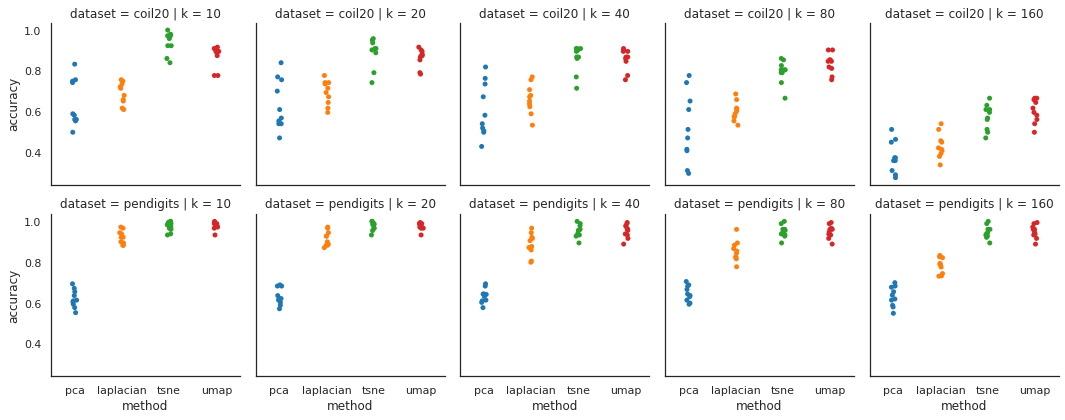

In [ ]:
g = sns.FacetGrid(accuracies, col="k",  row="dataset")
g.map(sns.stripplot, "method", "accuracy","method", jitter=0.05, palette="tab10")

In [ ]:
lis_summaries=[]
for dataset in ['coil20', 'pendigits']:
  summary=pd.DataFrame()
  summary['dataset'] = [dataset] * len(lis_k)
  summary['k'] = lis_k
  method='umap'
  for method in ['pca', 'laplacian', 'tsne', 'umap']:
    lis_values=[]
    for k in lis_k:
      temp=accuracies[(accuracies['k'] == k) & (accuracies['method'] == method) & (accuracies['dataset'] == dataset)]
      lis_values.append( str(round(np.mean(temp.accuracy),3) ) + ' (+- ' +  str(round(np.std(temp.accuracy), 3)) + ')' )
    summary[method] = lis_values
  lis_summaries.append(summary)

summary=pd.concat(lis_summaries)

In [ ]:
summary

,dataset,k,pca,laplacian,tsne,umap
0,coil20,10,0.644 (+- 0.109),0.69 (+- 0.051),0.941 (+- 0.051),0.874 (+- 0.05)
1,coil20,20,0.636 (+- 0.116),0.694 (+- 0.057),0.894 (+- 0.068),0.865 (+- 0.042)
2,coil20,40,0.608 (+- 0.125),0.663 (+- 0.068),0.861 (+- 0.063),0.858 (+- 0.05)
3,coil20,80,0.521 (+- 0.161),0.601 (+- 0.044),0.795 (+- 0.053),0.837 (+- 0.046)
4,coil20,160,0.378 (+- 0.073),0.433 (+- 0.057),0.574 (+- 0.059),0.604 (+- 0.055)
0,pendigits,10,0.622 (+- 0.041),0.923 (+- 0.031),0.974 (+- 0.023),0.979 (+- 0.018)
1,pendigits,20,0.632 (+- 0.039),0.917 (+- 0.035),0.977 (+- 0.02),0.977 (+- 0.017)
2,pendigits,40,0.635 (+- 0.034),0.887 (+- 0.052),0.953 (+- 0.03),0.952 (+- 0.031)
3,pendigits,80,0.647 (+- 0.036),0.855 (+- 0.048),0.951 (+- 0.029),0.95 (+- 0.03)
4,pendigits,160,0.631 (+- 0.046),0.784 (+- 0.036),0.947 (+- 0.03),0.951 (+- 0.031)


In [ ]:
summary.to_latex(index=False)

'\\begin{tabular}{lrllll}\n\\toprule\n  dataset &   k &              pca &        laplacian &             tsne &             umap \\\\\n\\midrule\n   coil20 &  10 & 0.644 (+- 0.109) &  0.69 (+- 0.051) & 0.941 (+- 0.051) &  0.874 (+- 0.05) \\\\\n   coil20 &  20 & 0.636 (+- 0.116) & 0.694 (+- 0.057) & 0.894 (+- 0.068) & 0.865 (+- 0.042) \\\\\n   coil20 &  40 & 0.608 (+- 0.125) & 0.663 (+- 0.068) & 0.861 (+- 0.063) &  0.858 (+- 0.05) \\\\\n   coil20 &  80 & 0.521 (+- 0.161) & 0.601 (+- 0.044) & 0.795 (+- 0.053) & 0.837 (+- 0.046) \\\\\n   coil20 & 160 & 0.378 (+- 0.073) & 0.433 (+- 0.057) & 0.574 (+- 0.059) & 0.604 (+- 0.055) \\\\\npendigits &  10 & 0.622 (+- 0.041) & 0.923 (+- 0.031) & 0.974 (+- 0.023) & 0.979 (+- 0.018) \\\\\npendigits &  20 & 0.632 (+- 0.039) & 0.917 (+- 0.035) &  0.977 (+- 0.02) & 0.977 (+- 0.017) \\\\\npendigits &  40 & 0.635 (+- 0.034) & 0.887 (+- 0.052) &  0.953 (+- 0.03) & 0.952 (+- 0.031) \\\\\npendigits &  80 & 0.647 (+- 0.036) & 0.855 (+- 0.048) & 0.951 (+- 0.0

## Comparison of dimension reduction algorithms

In [ ]:
obj=coil20
method='umap'
lis_embedds=[]

for obj in lis_obj:
  for method in ['pca', 'laplacian', 'tsne', 'umap']:
    temp=pd.DataFrame(embeddings[obj.name][method])
    temp.columns = ['dim1', 'dim2']
    temp['method']= method
    temp['data'] = obj.name
    temp['label'] = obj.y
    lis_embedds.append(temp)

temp=pd.concat(lis_embedds)
temp['label']=['c' + str(x) for x in temp.label.tolist()]

In [ ]:
temp

,dim1,dim2,method,data,label
0,0.027435,3.222702,pca,coil20,c1
1,-0.291172,3.252688,pca,coil20,c1
2,-0.737440,3.454651,pca,coil20,c1
3,-1.096275,3.455837,pca,coil20,c1
4,-1.609226,3.509030,pca,coil20,c1
...,...,...,...,...,...
1792,-0.790495,5.449836,umap,pendigits,c9
1793,16.872265,8.347258,umap,pendigits,c0
1794,-4.965218,10.070849,umap,pendigits,c8
1795,-0.723243,6.052888,umap,pendigits,c9


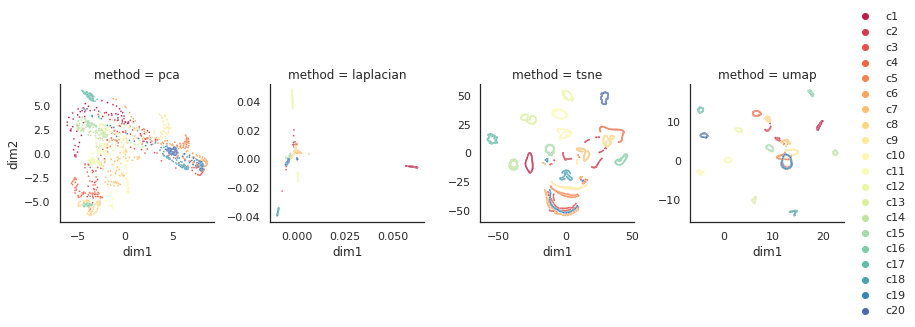

In [ ]:
g = sns.FacetGrid(temp[temp['data']== 'coil20'], col="method",sharex=False, sharey=False)
g.map(sns.scatterplot, "dim1", "dim2","label", s=3, palette='Spectral')
g.add_legend()


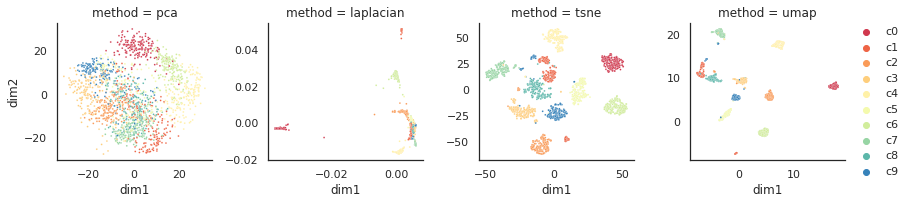

In [ ]:
g = sns.FacetGrid(temp[temp['data']== 'pendigits'], col="method",sharex=False, sharey=False)
g.map(sns.scatterplot, "dim1", "dim2","label", s=3, palette='Spectral')
g.add_legend()


## Modifying a and b parameters

In [ ]:
obj=pendigits
vec_a=[1,3,5,7]
vec_b=[0.25, 0.5, 0.75, 1]

lis_embedds=[]
for a in vec_a:
  for b in vec_b:
    # umap
    reducer = umap.UMAP(random_state=42, a=a, b=b)
    embedd=pd.DataFrame(reducer.fit_transform(obj.x))
    embedd.columns = ['dim1', 'dim2']
    embedd['a']= str(a) 
    embedd['b']= str(b)
    embedd['label'] = obj.y
    lis_embedds.append(embedd) 


In [ ]:
embedd=pd.concat(lis_embedds)
embedd['label']=['c' + str(x) for x in embedd.label.tolist()]

In [ ]:
embedd

,dim1,dim2,a,b,label
0,34.527664,11.599895,1,0.25,c0
1,-24.160902,-2.546719,1,0.25,c1
2,-1.547929,-4.838167,1,0.25,c2
3,3.624226,18.716593,1,0.25,c3
4,15.300611,31.614914,1,0.25,c4
...,...,...,...,...,...
1792,-1.763707,6.421107,7,1,c9
1793,9.512138,6.710313,7,1,c0
1794,0.877345,8.119952,7,1,c8
1795,-1.411329,6.468732,7,1,c9


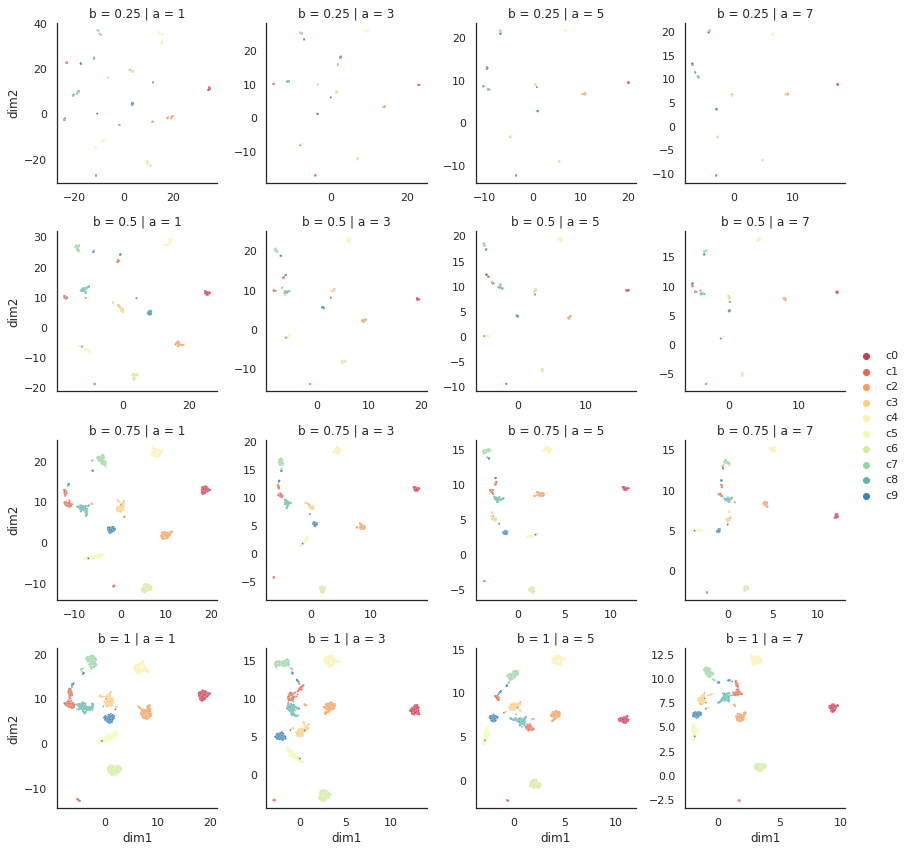

In [ ]:
g = sns.FacetGrid(embedd, col="a", row="b", sharex=False, sharey=False)
g.map(sns.scatterplot, "dim1", "dim2", "label",  s=3, palette='Spectral')
g.add_legend()